# 🏥 Medical Insurance Cost Prediction using Machine Learning

## 📘 Problem Statement
The goal of this project is to predict **individual medical insurance costs** based on personal and lifestyle attributes such as age, gender, BMI, smoking habits, and region.  
Accurate prediction of healthcare costs can assist insurance companies in risk assessment and help individuals understand how different factors impact their medical expenses.

---

## 📊 Dataset Overview
The dataset contains demographic and lifestyle information of insured individuals along with their **annual medical charges**.

**Source:** 
---

## 🧩 Features Description

| Feature | Type | Description |
|:---------|:------|:-------------|
| `age` | Numeric | Age of the individual |
| `sex` | Categorical | Gender of the individual (`male`, `female`) |
| `bmi` | Numeric | Body Mass Index — a measure of body fat based on height and weight |
| `children` | Numeric | Number of children/dependents covered by insurance |
| `smoker` | Categorical | Smoking status (`yes`, `no`) |
| `region` | Categorical | Residential region in the U.S. (`northeast`, `northwest`, `southeast`, `southwest`) |
| `charges` | Numeric (Target) | Individual medical insurance cost (in USD) |

---

## 🎯 Objective
Build and evaluate regression models using **Scikit-Learn** to predict the `charges` value based on the input features.  
The workflow includes:
- Data loading & exploration  
- Preprocessing & encoding  
- Feature scaling  
- Model training & evaluation  
- Model deployment

## Import required libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Load the dataset

In [2]:
df = pd.read_csv("Insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check data types
print("\nData types:")
print(df.dtypes)

Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [7]:
## Check for duplicate values
df.duplicated().sum()

1

In [8]:
## Drop duplicates values
df = df.drop_duplicates()

In [9]:
# Statistical summary of categorical columns
df.describe(include=['O'])

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


## Exploratory Data Analysis

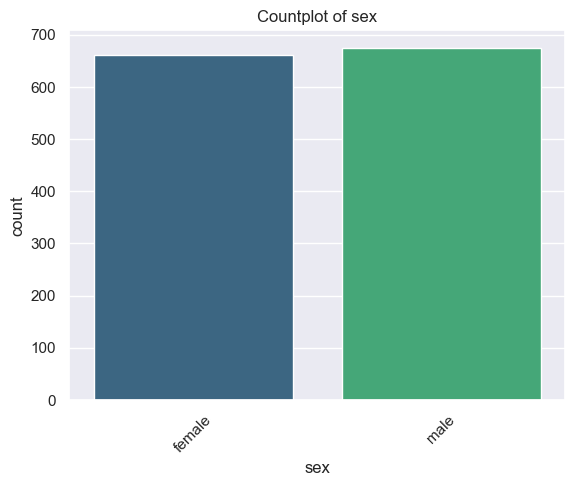

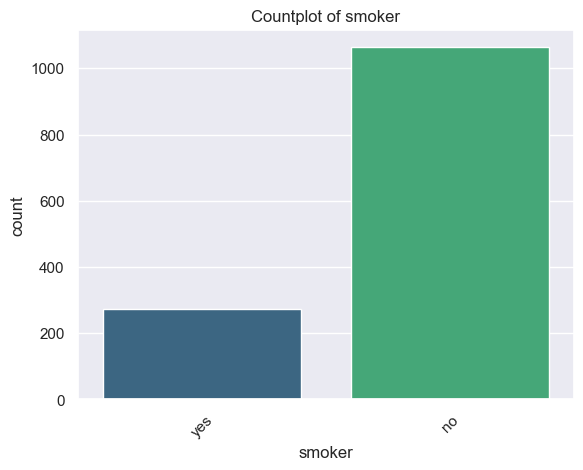

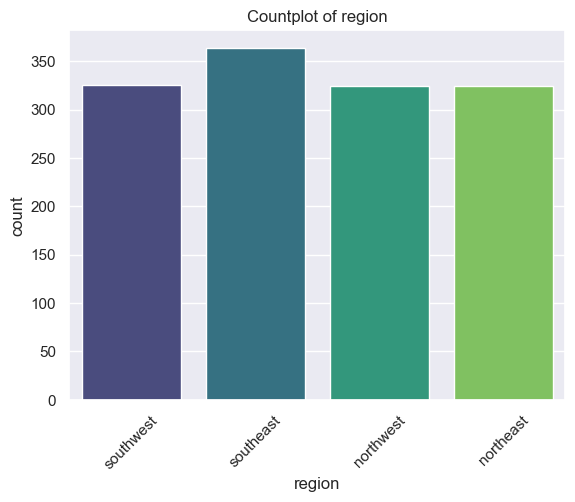

In [10]:
for categorical_col in df.select_dtypes(include='object'):
    plt.figure()
    sns.countplot(data=df, x=categorical_col, palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f"Countplot of {categorical_col}")
    plt.show()

## Correlation Matrix

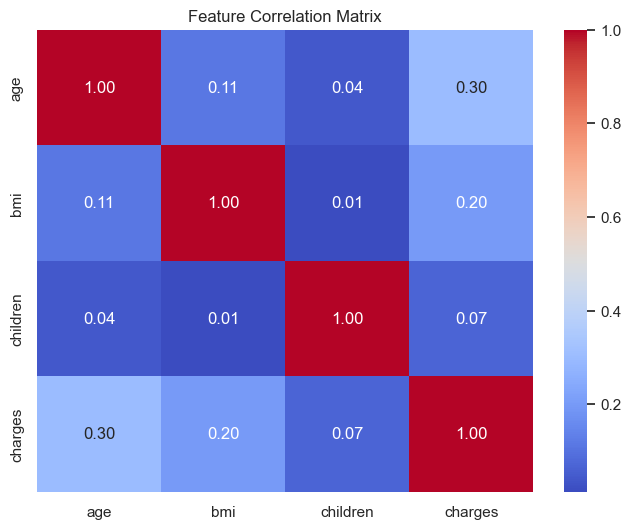

In [11]:
plt.figure(figsize=(8,6))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

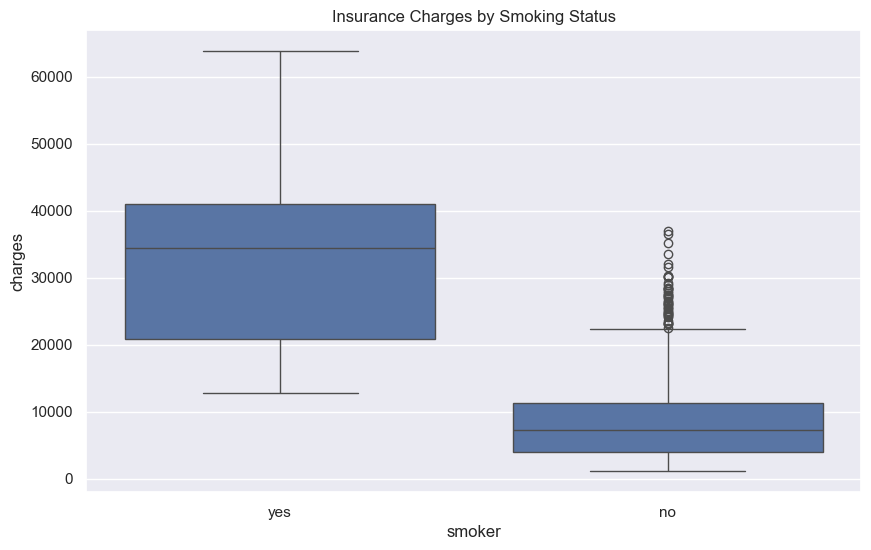

In [12]:
# Relationship between smoking and charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Insurance Charges by Smoking Status')
plt.show()

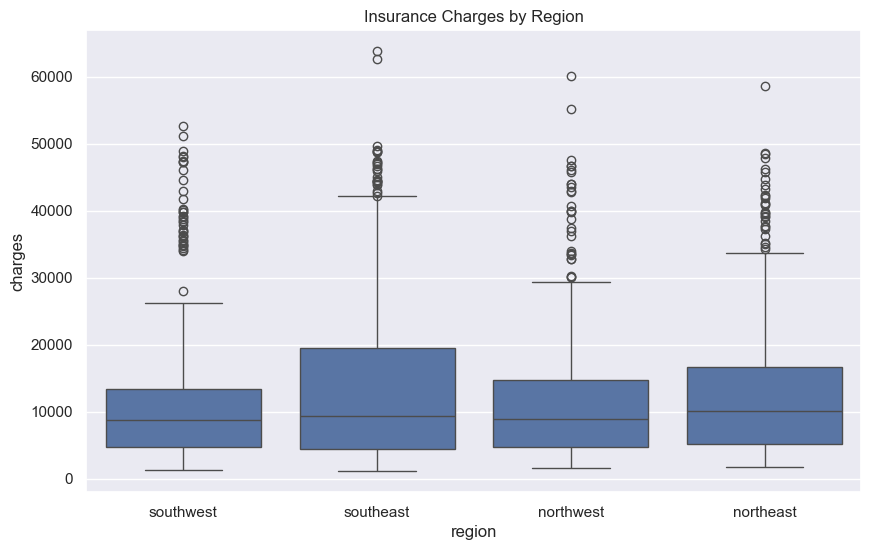

In [13]:
# Charges distribution by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Insurance Charges by Region')
plt.show()

#### Charges has many outliers

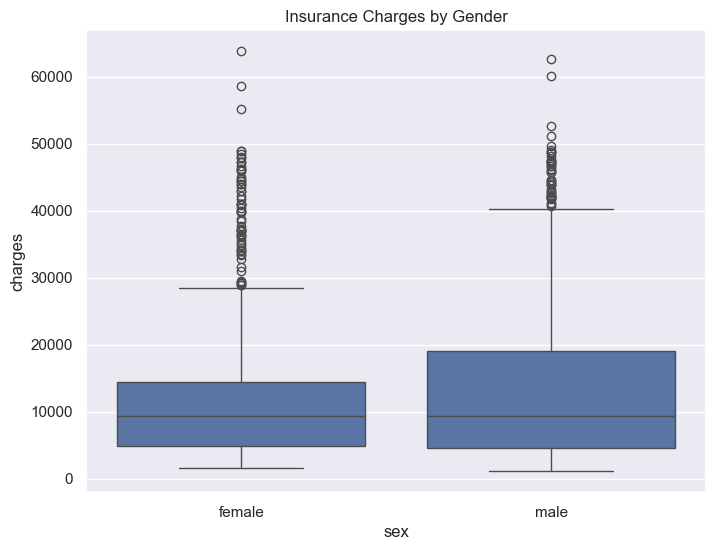

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Insurance Charges by Gender')
plt.show()

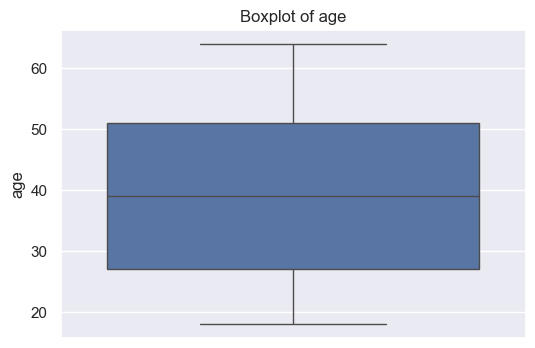

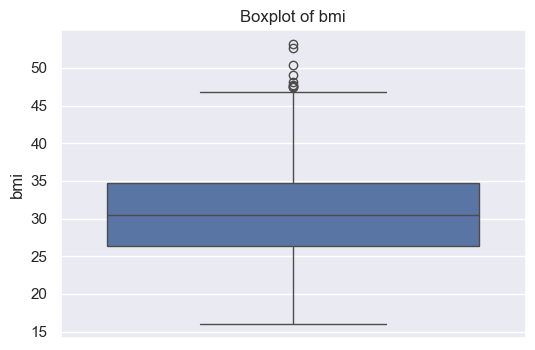

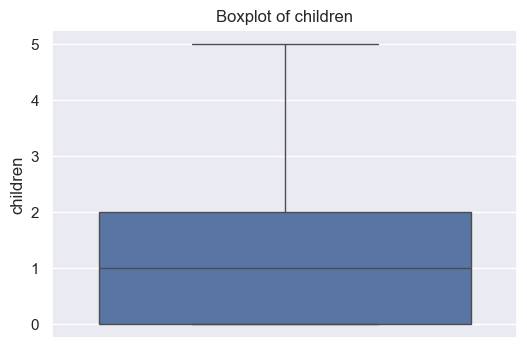

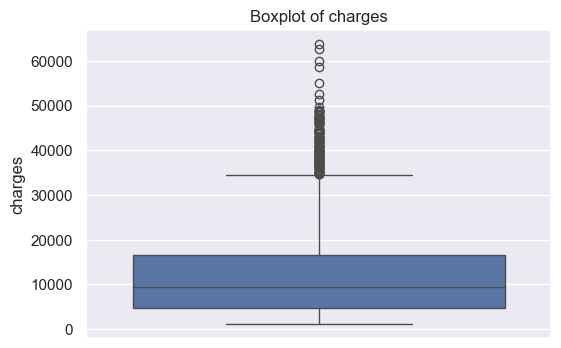

In [15]:
# Boxplots for Outlier Detection
for col in df.select_dtypes(include='number'):
    plt.figure(figsize=(6,4))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [16]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns
print("Numerical columns:")
print(numerical_columns)

categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
print(categorical_columns)

Numerical columns:
Index(['age', 'bmi', 'children', 'charges'], dtype='object')

Categorical columns:
Index(['sex', 'smoker', 'region'], dtype='object')


In [17]:
for col in df[categorical_columns].columns:
    print(df[col].value_counts())
    print("*"*20)

sex
male      675
female    662
Name: count, dtype: int64
********************
smoker
no     1063
yes     274
Name: count, dtype: int64
********************
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64
********************


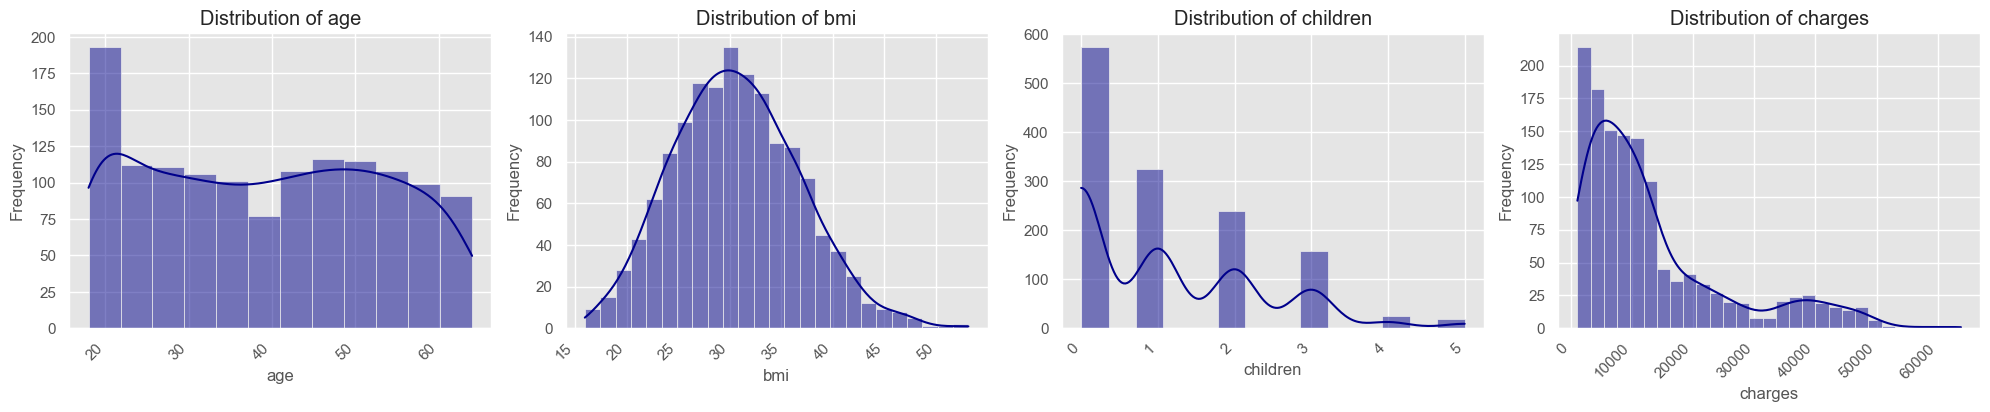

In [18]:
plt.figure(figsize=(20, 15))
plt.style.use('ggplot')


# Loop through each numerical column and plot its distribution
for i, col in enumerate(numerical_columns):
    # Create a subplot in a 3-row, 3-column grid, and place the current plot at position (i + 1)
    plt.subplot(4, 4, i + 1)

    # Create a histogram with a KDE (Kernel Density Estimate) line to show distribution shape
    sns.histplot(data=df, x=col, kde=True, palette='viridis', color='darkblue')

    # Set the title for the current subplot
    plt.title(f'Distribution of {col}')

    # Label the x-axis with the column name
    plt.xlabel(col)

    # Label the y-axis as 'Frequency'
    plt.ylabel('Frequency')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlapping of plots and labels
plt.tight_layout()

# Display all the generated plots
plt.show()

In [19]:
## ### BMI has outlier.so we have to peform outlier treatment on BMI feature
def cap_outliers(x):    # Changed from (data, col) to just (x)
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    return np.where(x > upper_bound, upper_bound,
                   np.where(x < lower_bound, lower_bound, x))

In [20]:
df['bmi'] = cap_outliers(df['bmi'])

## Encoding on Categorical Columns

In [21]:
df['sex'] = df['sex'].map({'male':1, 'female':0})
df['smoker'] = df['smoker'].map({'yes':1, 'no':0})
df['region'] = df['region'].map({'southeast':0, 'southwest':1, 'northwest':2, 'northeast':3})

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


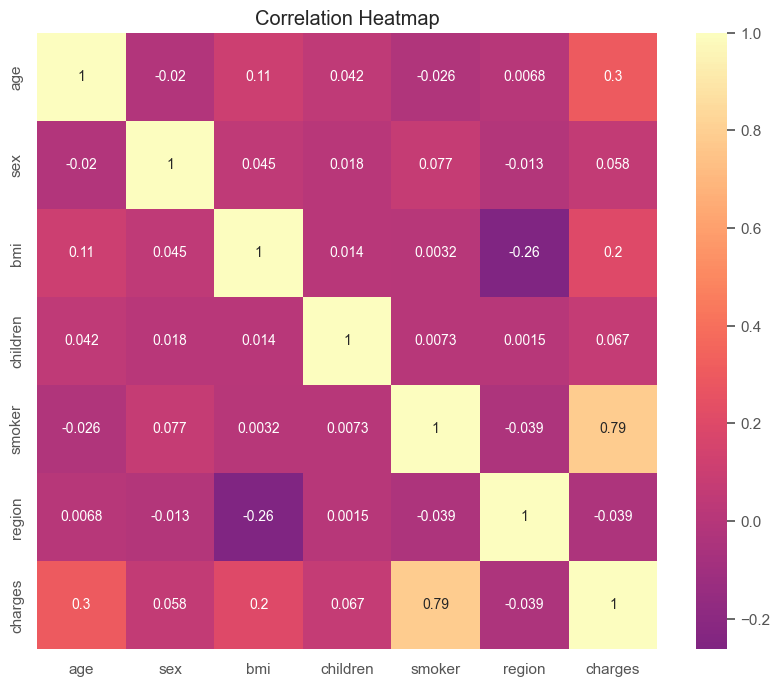

In [24]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='magma', center=0)
plt.title('Correlation Heatmap')
plt.show()

#### There is a strong correlation between medical charges and smoker.

Text(0.5, 1.0, 'Medical Insurance Charges among Non/Smokers')

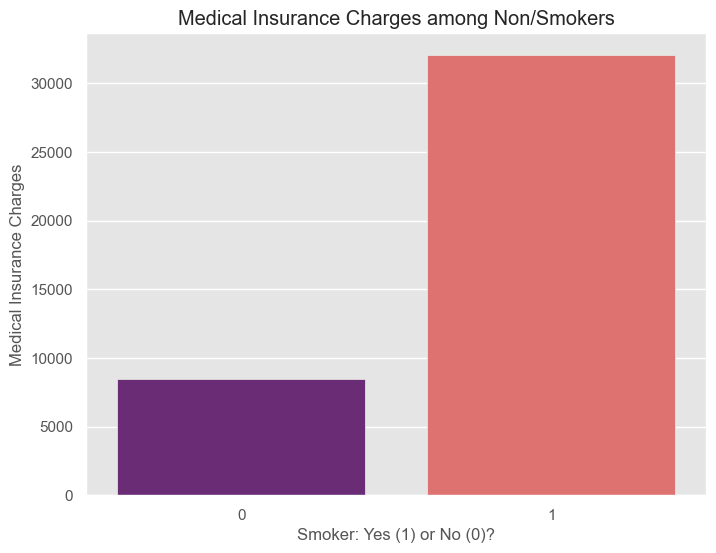

In [25]:
smoker_charges = df.groupby('smoker')['charges'].mean()
plt.figure(figsize=(8,6))
sns.barplot(x=smoker_charges.index, y=smoker_charges.values, palette='magma')
plt.ylabel('Medical Insurance Charges')
plt.xlabel('Smoker: Yes (1) or No (0)?')
plt.title('Medical Insurance Charges among Non/Smokers')

## Train test split

In [26]:
X = df.drop('charges', axis=1)
y= df['charges']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.shape, X_test.shape

((1069, 6), (268, 6))

In [29]:
# Fit scaler ONLY on numeric columns
numerical_col = ['age','bmi','children']

## initialize scaler
scaler = StandardScaler()

## Fit-transform the training data
X_train[numerical_col] = scaler.fit_transform(X_train[numerical_col])

## Transform only on the testing data
X_test[numerical_col] = scaler.transform(X_test[numerical_col])

In [30]:
## Evaludate Model
def evaluate_model(y_pred):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"R2 score: {r2:.4f}")
    print(f"mse score: {mse:.4f}")
    print(f"RMSE score: {rmse:.4f}")

In [31]:
X_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [32]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results.append({
        "Model": name,
        "R² Score": round(r2, 3),
        "MSE": round(mse, 2),
        "RMSE": round(rmse, 2)
    })

# Create a DataFrame for comparison
results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False)
print("Model Performance Comparison:\n")
print(results_df)

Model Performance Comparison:

                   Model  R² Score          MSE     RMSE
4      Gradient Boosting     0.904  17642352.30  4200.28
3          Random Forest     0.883  21536752.38  4640.77
5           XGBRegressor     0.858  26111571.17  5109.95
0      Linear Regression     0.807  35461768.12  5954.98
2       Lasso Regression     0.807  35461880.60  5954.99
1       Ridge Regression     0.806  35643752.51  5970.24
6  DecisionTreeRegressor     0.785  39572745.08  6290.69


## Model Evaluation

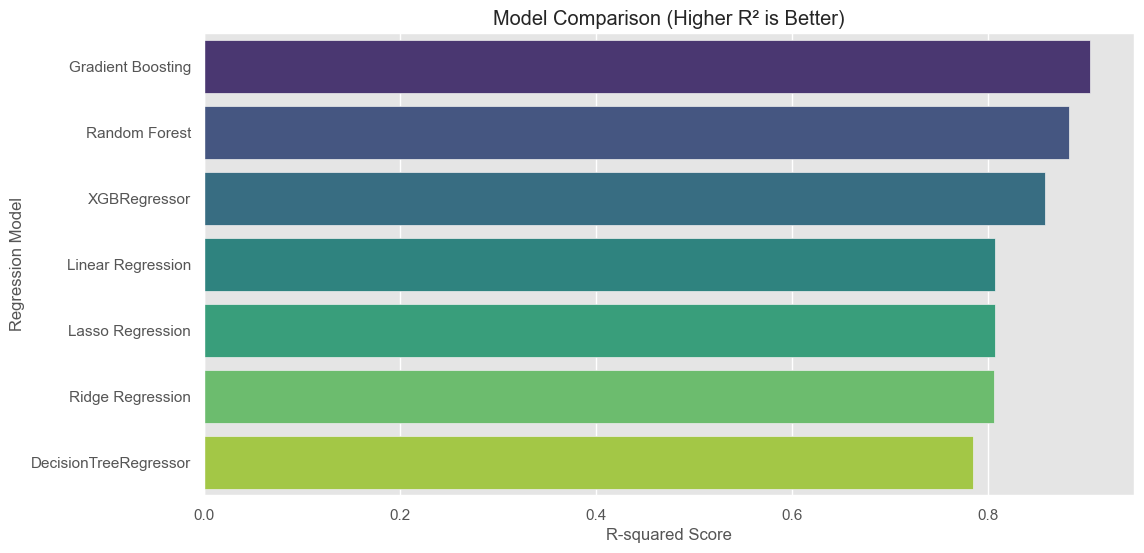

In [33]:
# Visualization of Model Performance
plt.figure(figsize=(12,6))
sns.barplot(x="R² Score", y="Model", data=results_df, palette="viridis")
plt.title("Model Comparison (Higher R² is Better)")
plt.xlabel("R-squared Score")
plt.ylabel("Regression Model")
plt.show()

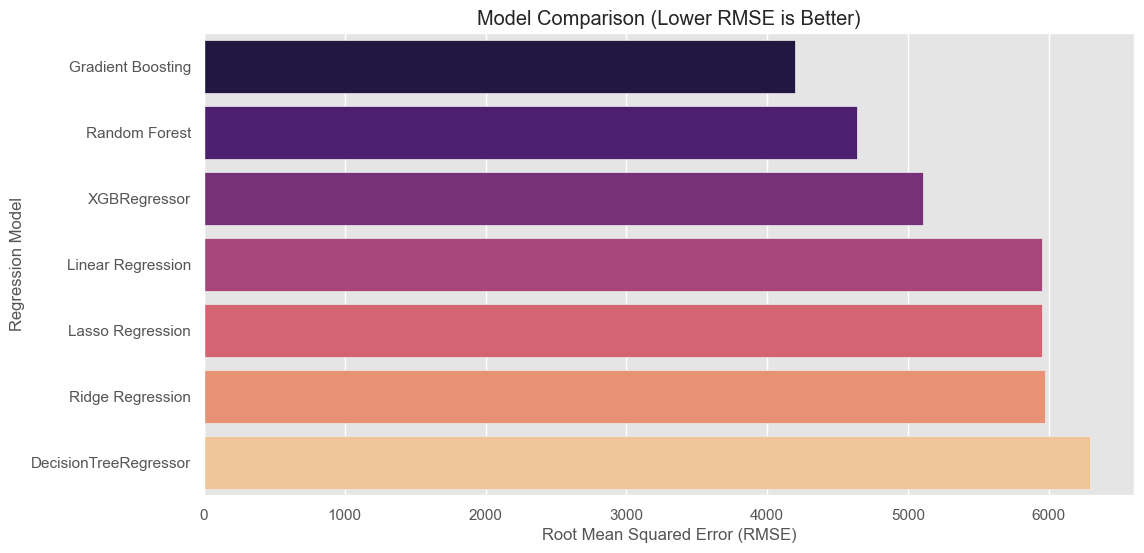

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(x="RMSE", y="Model", data=results_df, palette="magma")
plt.title("Model Comparison (Lower RMSE is Better)")
plt.xlabel("Root Mean Squared Error (RMSE)")
plt.ylabel("Regression Model")
plt.show()

###  Gradient Boosting boosting outperforms other regression model with impressive R2-Score 90%.Lets improve model performance with hyper parameter tunning. 

In [35]:
# Model
gbr = GradientBoostingRegressor(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

In [36]:
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='r2',        # maximize R²
    n_jobs=-1,           # use all cores
    verbose=1
)

# Fit on preprocessed training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


,estimator,GradientBoost...ndom_state=42)
,param_grid,"{'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 4, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...], ...}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [37]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}
Best score: 0.8442173209433065


## Predict and Evaluate the model

In [38]:
y_pred_best = best_model.predict(X_test)

# Evaluate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, y_pred_best)
mae = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))

print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.904
MAE: 2468.58
RMSE: 4205.90


In [39]:
import pickle
pickle.dump(best_model, open('best_model.pkl','wb'))
pickle.dump(scaler, open('scaler.pkl','wb'))

### Feature Impotance

In [49]:
feature_importance = pd.DataFrame(data =best_model.feature_importances_, index=X.columns, columns=['Importance'])
feature_importance.sort_values(by="Importance", ascending=False)

,Importance
smoker,0.675723
bmi,0.183500
age,0.123342
children,0.013722
region,0.002760
sex,0.000953


In [41]:
feature_importance = feature_importance[feature_importance['Importance'] > 0.01]
feature_importance

,Importance
age,0.123342
bmi,0.183500
children,0.013722
smoker,0.675723


In [42]:
## Let's drop these two colums
df.drop(df[['sex', 'region']], axis = 1, inplace=True)
Xf = df.drop(df[['charges']], axis = 1)

In [43]:
y= df['charges']

In [44]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(Xf, y, test_size=0.2,  random_state=42)

In [45]:
## Building model and evaluate
final_model =  GradientBoostingRegressor(learning_rate =  0.05, max_depth =  3, min_samples_split = 10, n_estimators = 100, subsample = 0.8)
final_model.fit(X_train_new, y_train_new)
y_train_pred_new = final_model.predict(X_train_new)
y_test_pred_new = final_model.predict(X_test_new)
r2_train = r2_score(y_train_new, y_train_pred_new)
r2_test = r2_score(y_test_new, y_test_pred_new)
mae = mean_absolute_error(y_test_new, y_test_pred_new)
rmse = np.sqrt(mean_squared_error(y_test_new, y_test_pred_new))
print(f"Training R² Score: {r2_train:.3f}")
print(f"Testing R² Score: {r2_test:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

Training R² Score: 0.876
Testing R² Score: 0.902
MAE: 2464.43
RMSE: 4247.41


### Prediction

In [46]:
pred = best_model.predict(X_test[20:25])
print(pred)

[ 3433.82420318 19934.06324283 10942.82922161 20891.12690472
 39401.89553001]


In [47]:
new_data = pd.DataFrame({
    'age': [19],
    'sex': ['male'],
    'bmi': [29.8],
    'children': [0],
    'smoker': ['yes'],
    'region': ['northeast']
})
new_data['sex'] = new_data['sex'].map({'male':1, 'female':0})
new_data['smoker'] = new_data['smoker'].map({'yes':1, 'no':0})
new_data['region'] = new_data['region'].map({'southeast':0, 'southwest':1, 'northwest':2, 'northeast':3})
best_model.predict(new_data)

array([47774.98198633])

In [48]:
print(f"NumPy Version: {np.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"Scikit-learn Version: {sklearn.__version__}")

NumPy Version: 1.26.4
Pandas Version: 2.3.3
Scikit-learn Version: 1.7.2


### Conclusion
Our analysis and model comparison indicate that Gradient Boosting achieved the highest R-squared score, closely followed by Random Forest and XGBoost. These ensemble methods demonstrated superior performance in predicting medical insurance charges, suggesting their ability to capture complex non-linear relationships within the data.

The exploratory data analysis highlighted the significant impact of factors like smoker status on charges, reinforcing its importance as a predictive feature. Further improvements was done with hyperparameter tuning for the top-performing models